In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats.stats import pearsonr
from factor_analyzer import FactorAnalyzer
import pingouin as pg

C:\Users\rahaf\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\rahaf\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
df = pd.read_csv("dataForAnalysis.csv")

In [3]:
df.shape

(6795, 28)

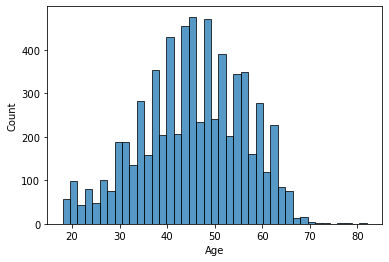

In [7]:
sns.histplot(df["age"]);
plt.xlabel('Age');
plt.savefig('Age.pdf')

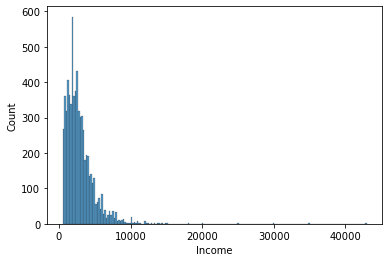

In [6]:
sns.histplot(df["plb0471_v2"]);
plt.xlabel('Income');
plt.savefig('Income.pdf')

C:\Users\rahaf\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


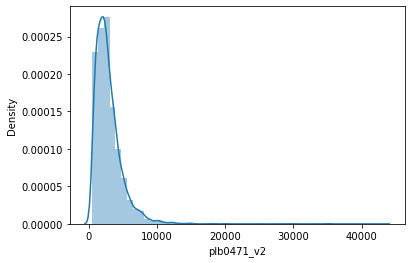

In [3]:
sns.distplot(df["plb0471_v2"]);

# Demo

## Age, Educational Years, Income

In [24]:
print(round(df[["age", "pgbilzeit", "plb0471_v2"]].describe(), 2).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      age &  pgbilzeit &  plb0471\_v2 \\
\midrule
count &  6795.00 &    6795.00 &     6795.00 \\
mean  &    45.29 &      12.70 &     2884.43 \\
std   &    10.91 &       2.79 &     2082.93 \\
min   &    18.00 &       7.00 &      500.00 \\
25\%   &    38.00 &      10.50 &     1550.00 \\
50\%   &    46.00 &      12.00 &     2458.00 \\
75\%   &    53.00 &      14.50 &     3600.00 \\
max   &    82.00 &      18.00 &    43000.00 \\
\bottomrule
\end{tabular}



In [25]:
print(df[["age", "pgbilzeit", "plb0471_v2"]].describe().to_latex())

\begin{tabular}{lrrr}
\toprule
{} &          age &    pgbilzeit &    plb0471\_v2 \\
\midrule
count &  6795.000000 &  6795.000000 &   6795.000000 \\
mean  &    45.288742 &    12.698455 &   2884.434437 \\
std   &    10.906469 &     2.794743 &   2082.932654 \\
min   &    18.000000 &     7.000000 &    500.000000 \\
25\%   &    38.000000 &    10.500000 &   1550.000000 \\
50\%   &    46.000000 &    12.000000 &   2458.000000 \\
75\%   &    53.000000 &    14.500000 &   3600.000000 \\
max   &    82.000000 &    18.000000 &  43000.000000 \\
\bottomrule
\end{tabular}



## Gender, Fedral State, Migration Background, Employment Status

In [26]:
df.sex.value_counts() # 1:Male, 2: Female

2    3441
1    3354
Name: sex, dtype: int64

In [27]:
df.sex.value_counts(normalize= True) # 1:Male, 2: Female

2    0.506402
1    0.493598
Name: sex, dtype: float64

In [28]:
df.bula.value_counts() # 1:West, 2:East

1    5506
2    1289
Name: bula, dtype: int64

In [29]:
df.bula.value_counts(normalize= True) # 1:West, 2:East

1    0.810302
2    0.189698
Name: bula, dtype: float64

In [30]:
df.employStat.value_counts() # 1: Full-Time Employment, 2: Regular Part-Time Employment, 3: Others, 4: Not Employed

1    4269
2    1896
4     378
3     252
Name: employStat, dtype: int64

In [31]:
df.employStat.value_counts(normalize= True) # 1: Full-Time Employment, 2: Regular Part-Time Employment, 3: Others, 4: Not Employed

1    0.628256
2    0.279029
4    0.055629
3    0.037086
Name: employStat, dtype: float64

In [32]:
df.migback.value_counts() # 1: No migration background, 2: Direct migration background, 3: Indirect migration background

1    4775
2    1585
3     435
Name: migback, dtype: int64

In [33]:
df.migback.value_counts(normalize= True) # 1: No migration background, 2: Direct migration background, 3: Indirect migration background

1    0.702723
2    0.233260
3    0.064018
Name: migback, dtype: float64

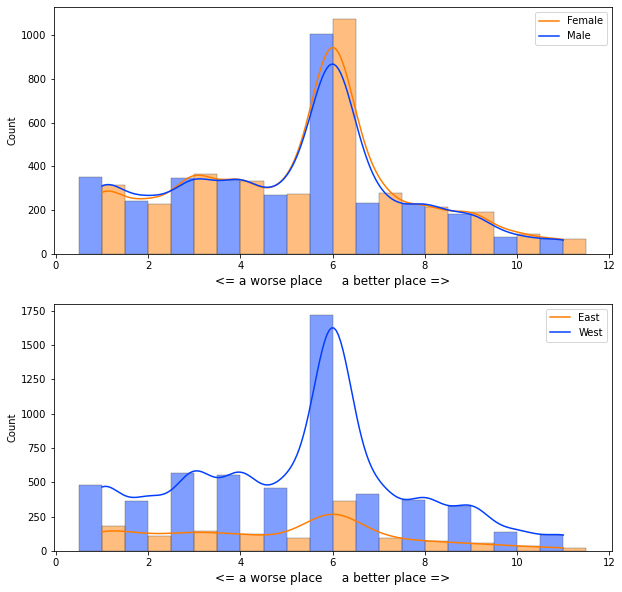

In [55]:
Demo = ['sex','bula']

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 1)
ax ={}
for c in range(len(Demo)): #survey year
    if c < 1:
        ax[0]=fig.add_subplot(gs[0,c])
    else:
        ax[0]=fig.add_subplot(gs[1,c-2])
    #ax[0].set_title("Will Germany become a better or worse place to live because of the refugees?",fontsize=14)
    g=sns.histplot(df,
                x="plj0435",
                hue=Demo[c],
                kde=True,
                discrete=True,
                multiple='dodge',
                edgecolor=".3",
                palette= "bright",
                linewidth=.35,
                ax=ax[0],
                legend=False)
    ax[0].set_xlabel("<= a worse place     a better place =>", fontsize=12)
    # legend customization
    if c==0:
        ax[0].legend(loc='best', labels=["Female", "Male"],fontsize = 10)
    else:
        ax[0].legend(loc='best', labels=["East", "West"],fontsize = 10)
    
#gs.title("Will Germany become a better or worse place to live because of the refugees?",fontsize=14)
#plt.show()
#fig.tight_layout()
#fig.suptitle("Will Germany become a better or worse place to live because of the refugees?",fontsize=14);
plt.savefig('DemoSexFSTest.pdf')  # remove plt.shoe() to get the pdf



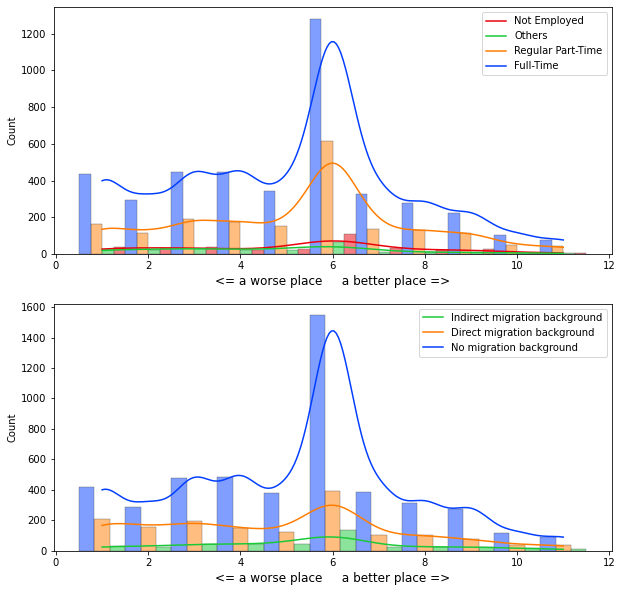

In [56]:
Demo = ["employStat", "migback"]

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 1)
ax ={}
for c in range(len(Demo)): #survey year
    if c < 1:
        ax[0]=fig.add_subplot(gs[0,c])
    else:
        ax[0]=fig.add_subplot(gs[1,c-2])
    #ax[0].set_title("Will Germany become a better or worse place to live because of the refugees?",fontsize=14)
    g=sns.histplot(df,
                x="plj0435",
                hue=Demo[c],
                kde=True,
                discrete=True,
                multiple='dodge',
                edgecolor=".3",
                palette= "bright",
                linewidth=.35,
                ax=ax[0],
                legend=False)
    ax[0].set_xlabel("<= a worse place     a better place =>", fontsize=12)
    # legend customization
    if c == 0:
        ax[0].legend(loc='best', labels=["Not Employed", "Others", "Regular Part-Time", "Full-Time"],fontsize = 10)
    else:
        ax[0].legend(loc='best', labels=["Indirect migration background", "Direct migration background", "No migration background"],fontsize = 10)
#gs.title("Will Germany become a better or worse place to live because of the refugees?",fontsize=14)
#plt.show()
#fig.tight_layout()
#fig.suptitle("Will Germany become a better or worse place to live because of the refugees?",fontsize=14);
plt.savefig('DemoRest.pdf')  # remove plt.shoe() to get the pdf



# Attitudes distribution

In [115]:
df["attitude"] = np.where(df["plj0435"] >= 8, 3, (np.where(df["plj0435"] >=4, 2, 1)))

In [116]:
df["attitude"].value_counts()

2    3812
1    1852
3    1131
Name: attitude, dtype: int64

In [117]:
df["attitude"].value_counts(normalize = True)

2    0.561001
1    0.272553
3    0.166446
Name: attitude, dtype: float64

In [118]:
df["plj0435"].value_counts()

6.0     2077
3.0      714
4.0      676
1.0      667
5.0      547
7.0      512
2.0      471
8.0      442
9.0      379
10.0     170
11.0     140
Name: plj0435, dtype: int64

In [119]:
var = ["sex", "migback", "employStat", "bula" ]
for col in var:
    print(col, "\n", df[df["attitude"] == 1][col].value_counts(normalize = True))

sex 
 1    0.508639
2    0.491361
Name: sex, dtype: float64
migback 
 1    0.640929
2    0.302376
3    0.056695
Name: migback, dtype: float64
employStat 
 1    0.636609
2    0.255400
4    0.059395
3    0.048596
Name: employStat, dtype: float64
bula 
 1    0.764039
2    0.235961
Name: bula, dtype: float64


In [120]:
var = ["sex", "migback", "employStat", "bula" ]
for col in var:
    print(col, "\n", df[df["attitude"] == 2][col].value_counts(normalize = True))

sex 
 2    0.514428
1    0.485572
Name: sex, dtype: float64
migback 
 1    0.732686
2    0.201731
3    0.065582
Name: migback, dtype: float64
employStat 
 1    0.629328
2    0.284627
4    0.052991
3    0.033054
Name: employStat, dtype: float64
bula 
 1    0.824502
2    0.175498
Name: bula, dtype: float64


In [121]:
var = ["sex", "migback", "employStat", "bula" ]
for col in var:
    print(col, "\n", df[df["attitude"] == 3][col].value_counts(normalize = True))

sex 
 2    0.503979
1    0.496021
Name: sex, dtype: float64
migback 
 1    0.702918
2    0.226348
3    0.070734
Name: migback, dtype: float64
employStat 
 1    0.610964
2    0.298851
4    0.058355
3    0.031830
Name: employStat, dtype: float64
bula 
 1    0.838196
2    0.161804
Name: bula, dtype: float64


# Correlation Analysis

In [27]:
def corr(column_list, p_labels, title):
  # correlation matrices between different domains of predictors?
  corr = df[column_list].corr(method = "pearson")
  #sns.heatmap(corr,annot=True,cmap="Blues",vmin=0, vmax=1)
  # Set up the matplotlib plot configuration
  f, ax = plt.subplots(figsize=(15,15))
  # generate a mask for upper traingle
  mask = np.triu(np.ones_like(corr, dtype = bool))
  # configure a custom diverging colormap
  #cmap = sns.diverging_palette(230, 20, as_cmap = True)
  # draw the heatmap, round values to two decimal places
  sns.heatmap(corr, annot = True, mask = mask, cmap = "coolwarm", fmt = ".2f",  square= True , linewidths = 4,
              xticklabels = p_labels,
              yticklabels = p_labels) # coolwarm
  ax.set_title(title, fontsize = 7) 

## Demo

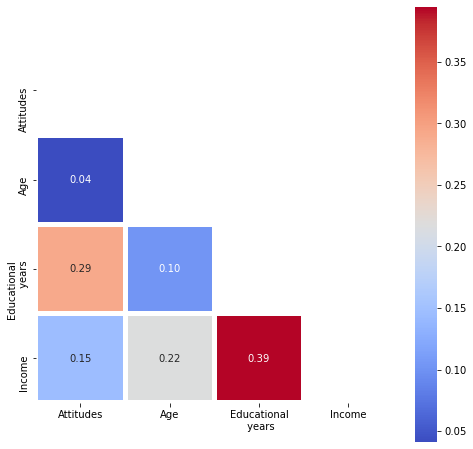

In [12]:
demo = ["plj0435", "age", "pgbilzeit", "plb0471_v2"]
labels = ["Attitudes","Age", "Educational\n years", "Income"]
corr(demo, labels, "")
plt.savefig('dempCorr.pdf')

In [124]:
for col in ["age", "pgbilzeit", "plb0471_v2"]:
    pearson_coef, p_value = pearsonr(df["plj0435"], df[col]) #define the columns to perform calculations on
    print("variable: ", col, "\n", "pearson_coef = ", round(pearson_coef, 3), "\n", "p_value = ", round(p_value, 3))
    

variable:  age 
 pearson_coef =  0.041 
 p_value =  0.001
variable:  pgbilzeit 
 pearson_coef =  0.291 
 p_value =  0.0
variable:  plb0471_v2 
 pearson_coef =  0.145 
 p_value =  0.0


## Satisfaction

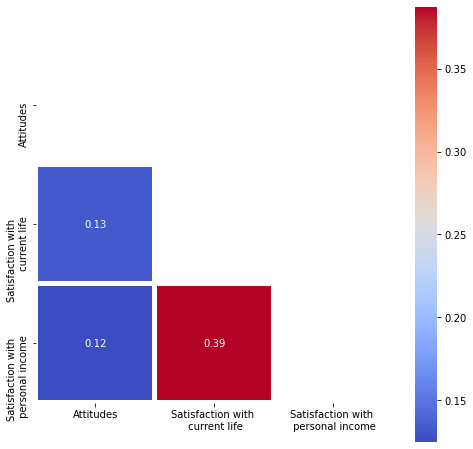

In [14]:
satis = ["plj0435", "plh0182", "plh0176"]
labels = ["Attitudes", "Satisfaction with \n current life", "Satisfaction with \n personal income"]
corr(satis, labels, "")
plt.savefig('statisCorr.pdf')

In [126]:
for col in ["age", "plh0182", "plh0176"]:
    pearson_coef, p_value = pearsonr(df["plj0435"], df[col]) #define the columns to perform calculations on
    print("variable: ", col, "\n", "pearson_coef = ", round(pearson_coef, 3), "\n", "p_value = ", round(p_value, 3))
    

variable:  age 
 pearson_coef =  0.041 
 p_value =  0.001
variable:  plh0182 
 pearson_coef =  0.134 
 p_value =  0.0
variable:  plh0176 
 pearson_coef =  0.125 
 p_value =  0.0


## Concerns

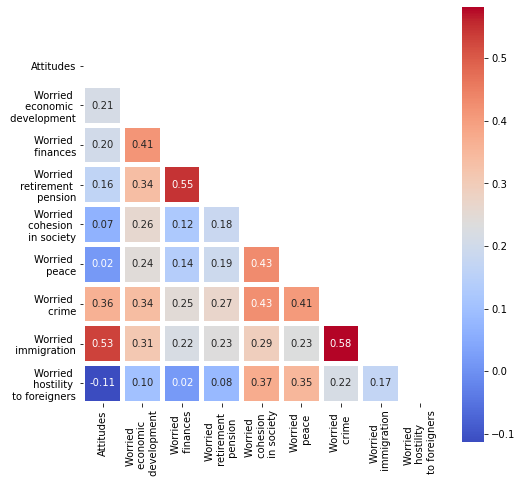

In [19]:
concerns = ["plj0435", "plh0032", "plh0033", "plh0335", "plh0336", "plh0038", "plh0040", "plj0046", "plj0047"]
labels = ["Attitudes", "Worried \n economic \n development", "Worried \n finances", "Worried \n retirement \n pension",
                "Worried \n cohesion \n in society", "Worried \n peace", "Worried \n crime",
                "Worried \n immigration", "Worried \n hostility \n to foreigners"]
corr(concerns, labels, " ")
plt.savefig('concernsCorr.pdf')

In [128]:
for col in ["plh0032", "plh0033", "plh0335", "plh0336", "plh0038", "plh0040", "plj0046", "plj0047"]:
    pearson_coef, p_value = pearsonr(df["plj0435"], df[col]) #define the columns to perform calculations on
    print("variable: ", col, "\n", "pearson_coef = ", round(pearson_coef, 3), "\n", "p_value = ", round(p_value, 3))
    

variable:  plh0032 
 pearson_coef =  0.213 
 p_value =  0.0
variable:  plh0033 
 pearson_coef =  0.204 
 p_value =  0.0
variable:  plh0335 
 pearson_coef =  0.164 
 p_value =  0.0
variable:  plh0336 
 pearson_coef =  0.068 
 p_value =  0.0
variable:  plh0038 
 pearson_coef =  0.017 
 p_value =  0.165
variable:  plh0040 
 pearson_coef =  0.363 
 p_value =  0.0
variable:  plj0046 
 pearson_coef =  0.531 
 p_value =  0.0
variable:  plj0047 
 pearson_coef =  -0.113 
 p_value =  0.0


## Threats

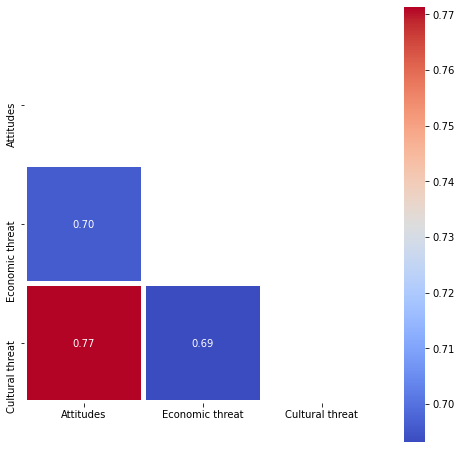

In [20]:
threats = ["plj0435", "plj0433", "plj0434"]
labels = ["Attitudes", "Economic threat", "Cultural threat"]
corr(threats, labels, "")
plt.savefig('Me.pdf')

In [130]:
for col in ["plj0433", "plj0434"]:
    pearson_coef, p_value = pearsonr(df["plj0435"], df[col]) #define the columns to perform calculations on
    print("variable: ", col, "\n", "pearson_coef = ", round(pearson_coef, 3), "\n", "p_value = ", round(p_value, 3))
    

variable:  plj0433 
 pearson_coef =  0.696 
 p_value =  0.0
variable:  plj0434 
 pearson_coef =  0.771 
 p_value =  0.0


## Personality traits

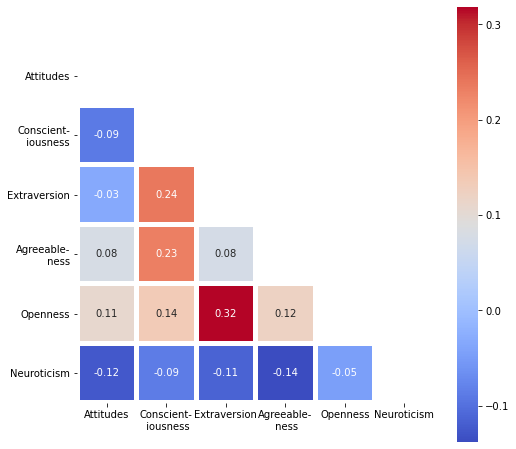

In [22]:
personality = ["plj0435", "bfi_consc", "bfi_extrav", "bfi_agree", "bfi_open", "bfi_neurot"]
labels = ["Attitudes", "Conscient-\n iousness", "Extraversion", "Agreeable-\n ness", "Openness","Neuroticism"]
corr(personality, labels, "")
plt.savefig('personCorr.pdf')

In [132]:
for col in ["bfi_consc", "bfi_extrav", "bfi_agree", "bfi_open", "bfi_neurot"]:
    pearson_coef, p_value = pearsonr(df["plj0435"], df[col]) #define the columns to perform calculations on
    print("variable: ", col, "\n", "pearson_coef = ", round(pearson_coef, 3), "\n", "p_value = ", round(p_value, 3))
    

variable:  bfi_consc 
 pearson_coef =  -0.089 
 p_value =  0.0
variable:  bfi_extrav 
 pearson_coef =  -0.031 
 p_value =  0.011
variable:  bfi_agree 
 pearson_coef =  0.08 
 p_value =  0.0
variable:  bfi_open 
 pearson_coef =  0.109 
 p_value =  0.0
variable:  bfi_neurot 
 pearson_coef =  -0.125 
 p_value =  0.0


## All variables

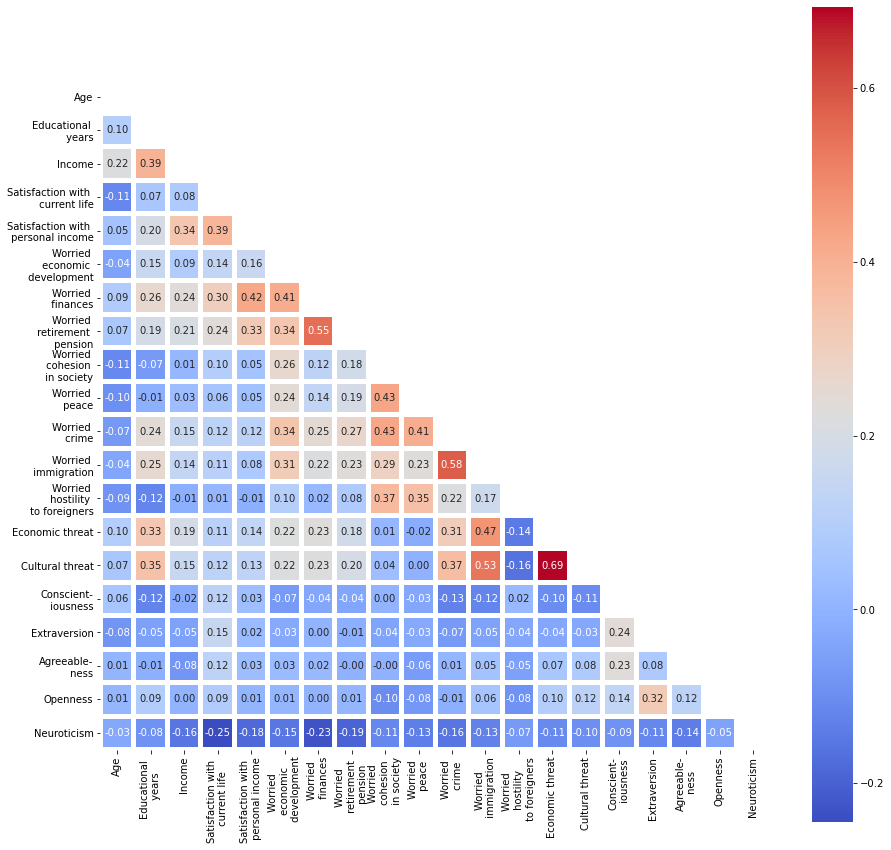

In [29]:
all_var = ["age", "pgbilzeit", "plb0471_v2", "plh0182", "plh0176", "plh0032", "plh0033", "plh0335", "plh0336",
           "plh0038", "plh0040", "plj0046", "plj0047", "plj0433", "plj0434", "bfi_consc", "bfi_extrav", "bfi_agree", "bfi_open", "bfi_neurot"]
labels = ["Age", "Educational \n years", "Income",  "Satisfaction with \n current life", "Satisfaction with \n personal income", "Worried \n economic \n development", "Worried \n finances", "Worried \n retirement \n pension",
                "Worried \n cohesion \n in society", "Worried \n peace", "Worried \n crime",
                "Worried \n immigration", "Worried \n hostility \n to foreigners", "Economic threat", "Cultural threat", "Conscient-\n iousness", "Extraversion", "Agreeable-\n ness", "Openness","Neuroticism"]

corr(all_var, labels, "")

plt.savefig('All.pdf')

In [23]:
all_var = ["age", "pgbilzeit", "plb0471_v2", "plh0182", "plh0176", "plh0032", "plh0033", "plh0335", "plh0336",
           "plh0038", "plh0040", "plj0046", "plj0047", "plj0433", "plj0434", "bfi_consc", "bfi_extrav", "bfi_agree", "bfi_open", "bfi_neurot"]
for col in all_var:
    pearson_coef, p_value = pearsonr(df["plj0435"], df[col]) #define the columns to perform calculations on
    print("variable: ", col, "\n", "pearson_coef = ", round(pearson_coef, 3), "\n", "p_value = ", round(p_value, 3))
    

variable:  age 
 pearson_coef =  0.041 
 p_value =  0.001
variable:  pgbilzeit 
 pearson_coef =  0.291 
 p_value =  0.0
variable:  plb0471_v2 
 pearson_coef =  0.145 
 p_value =  0.0
variable:  plh0182 
 pearson_coef =  0.134 
 p_value =  0.0
variable:  plh0176 
 pearson_coef =  0.125 
 p_value =  0.0
variable:  plh0032 
 pearson_coef =  0.213 
 p_value =  0.0
variable:  plh0033 
 pearson_coef =  0.204 
 p_value =  0.0
variable:  plh0335 
 pearson_coef =  0.164 
 p_value =  0.0
variable:  plh0336 
 pearson_coef =  0.068 
 p_value =  0.0
variable:  plh0038 
 pearson_coef =  0.017 
 p_value =  0.165
variable:  plh0040 
 pearson_coef =  0.363 
 p_value =  0.0
variable:  plj0046 
 pearson_coef =  0.531 
 p_value =  0.0
variable:  plj0047 
 pearson_coef =  -0.113 
 p_value =  0.0
variable:  plj0433 
 pearson_coef =  0.696 
 p_value =  0.0
variable:  plj0434 
 pearson_coef =  0.771 
 p_value =  0.0
variable:  bfi_consc 
 pearson_coef =  -0.089 
 p_value =  0.0
variable:  bfi_extrav 
 pearson

# Factor Anaylsis - Concerns

In [77]:
df_FA_Co = df[["plh0032", "plh0033", "plh0335", "plh0336", "plh0038", "plh0040", "plj0046", "plj0047"]]

fa = FactorAnalyzer()                                                            # initialization of FactorAnalyzer
fa.fit(df_FA_Co)    

FactorAnalyzer(rotation_kwargs={})

<ipython-input-90-eddabe6c172a>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


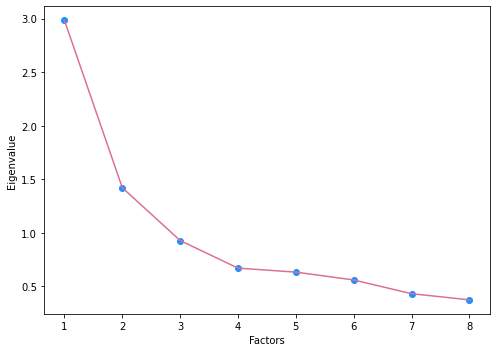

In [90]:
# get eigenvalues
ev, v = fa.get_eigenvalues()
# figure initialization
fig = plt.figure(figsize = (7, 5))
plt.scatter(range(1, df_FA_Co.shape[1] + 1), ev, color = "dodgerblue")
plt.plot(range(1, df_FA_Co.shape[1] + 1), ev, color = "palevioletred")

# add title and axes labels
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")

# show grid a#nd plot
fig.show()
fig.tight_layout()

# save figure
fig.savefig("Concerns_scree_plot.pdf", dpi = 300, format = "pdf")
#files.download("FTP_scree_plot.pdf") 

In [137]:
print(ev)

[2.98404022 1.4211362  0.9278378  0.66991115 0.63256053 0.55943197
 0.43120988 0.37387225]


In [79]:
# factor rotation
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(df_FA_Co)

# print factor loadings
loads = fa.loadings_
print(loads)

[[ 0.28773405  0.49398884]
 [ 0.01117066  0.82326768]
 [ 0.13879148  0.63337793]
 [ 0.65431966  0.12358568]
 [ 0.59189751  0.1385846 ]
 [ 0.64426293  0.32926208]
 [ 0.47310786  0.31020505]
 [ 0.47832656 -0.01610983]]


In [80]:
# definition of two factors based on factor analysis
factor_1 = df_FA_Co[["plh0032", "plh0033", "plh0335"]]
factor_2 = df_FA_Co[["plh0336", "plh0038", "plh0040", "plj0046", "plj0047"]]

# computation of Cronbach's alpha for both factors 
print("factor_1_alpha = ", pg.cronbach_alpha(factor_1))
print("factor_2_alpha = ", pg.cronbach_alpha(factor_2))

factor_1_alpha =  (0.6971209748887934, array([0.684, 0.709]))
factor_2_alpha =  (0.7257510394567281, array([0.715, 0.736]))


In [82]:
df["Con_Economic"] = df[["plh0032", "plh0033", "plh0335"]].mean(axis = 1)
df["Con_Security"] = df[["plh0336", "plh0038", "plh0040", "plj0046", "plj0047"]].mean(axis = 1)

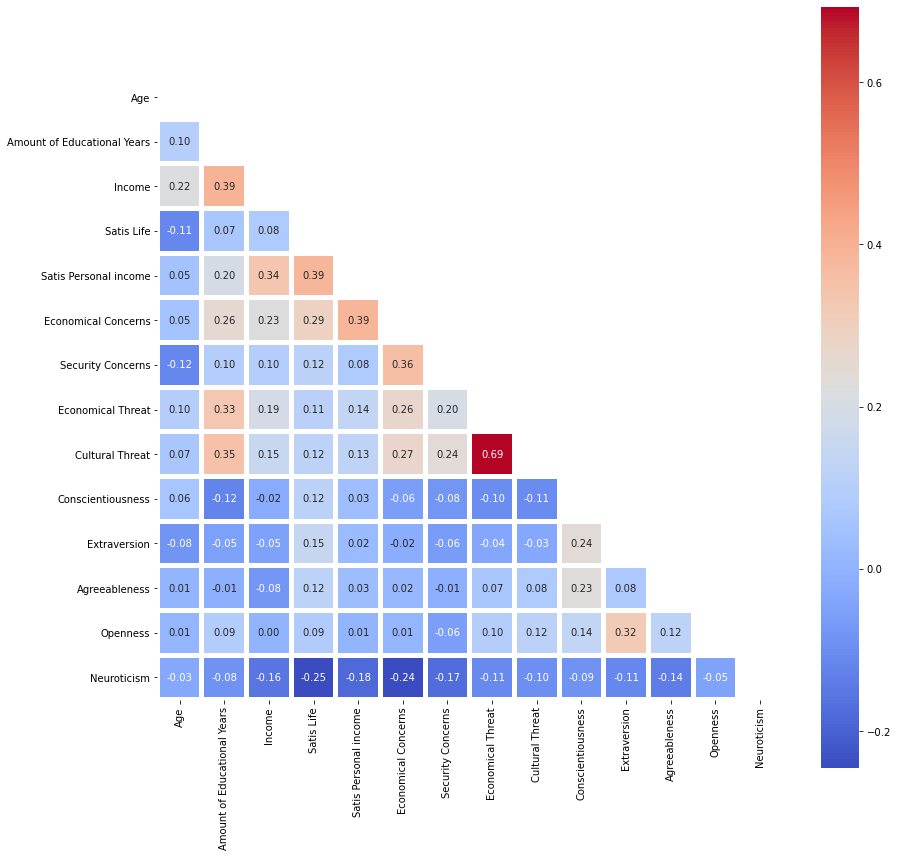

In [85]:
all_var = ["age", "pgbilzeit", "plb0471_v2", "plh0182", "plh0176", "Con_Economic", "Con_Security",  "plj0433", "plj0434", "bfi_consc", "bfi_extrav", "bfi_agree", "bfi_open", "bfi_neurot"]
labels = ["Age", "Amount of Educational Years", "Income",  "Satis Life", "Satis Personal income", 
          "Economical Concerns", "Security Concerns",
                 "Economical Threat", "Cultural Threat", "Conscientiousness", "Extraversion", "Agreeableness", "Openness","Neuroticism"]

corr(all_var, labels, "")
plt.savefig('CorrAll.pdf')  # remove plt.shoe() to get the pdf


In [142]:
df.columns

Index(['pid', 'cid', 'hid', 'plj0433', 'age', 'sex', 'bula', 'employStat',
       'pgbilzeit', 'plb0471_v2', 'migback', 'plh0182', 'plh0176', 'plh0032',
       'plh0033', 'plh0335', 'plh0336', 'plh0038', 'plh0040', 'plj0046',
       'plj0047', 'plj0434', 'plj0435', 'bfi_consc', 'bfi_extrav', 'bfi_agree',
       'bfi_open', 'bfi_neurot', 'attitude', 'Con_Economic', 'Con_Security'],
      dtype='object')

In [151]:
#df.to_csv("MyDataFinalCompositeScales.csv", index = False)